# Regressão Linear

## Equação normal
$$\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$


In [90]:
import numpy as np

X = 2 * np.random.rand(100, 1) # cria uma matriz bidimensional (um vetor coluna) chamada X. A função np.random.rand(100, 1) gera uma matriz de números aleatórios entre 0 e 1 com 100 linhas e 1 coluna (um vetor coluna). O valor retornado por np.random.rand segue uma distribuição uniforme entre 0 e 1. Multiplicando o resultado por 2, você aumenta a escala dos valores para variar entre 0 e 2. Portanto, X contém 100 valores aleatórios entre 0 e 2.
 
y = 4 + 3 * X + np.random.randn(100,1) # y=4+3x adiciona ruido a expressão linear anterior adicionando um ruído aleatório gaussiano. np.random.randn(100, 1) gera valores aleatórios de acordo com uma distribuição normal (gaussiana) com média 0 e desvio padrão 1.


In [91]:
# Calculando θ usando a equação normal:
X_b = np.c_[np.ones((100, 1)), X] # Adiciona x0 = 1 em cada instância, X bias
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # .dot -> multiplicação vetorial

theta_best

array([[3.9932401 ],
       [3.03329769]])

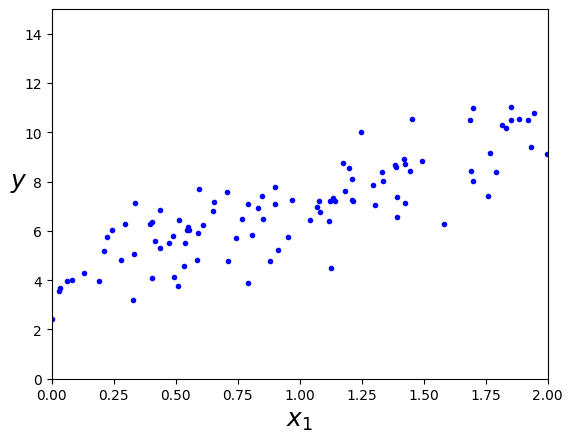

In [92]:
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [93]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones([2, 1]), X_new] # Adiciona x0 = 1 para cada instância

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9932401 ],
       [10.05983548]])

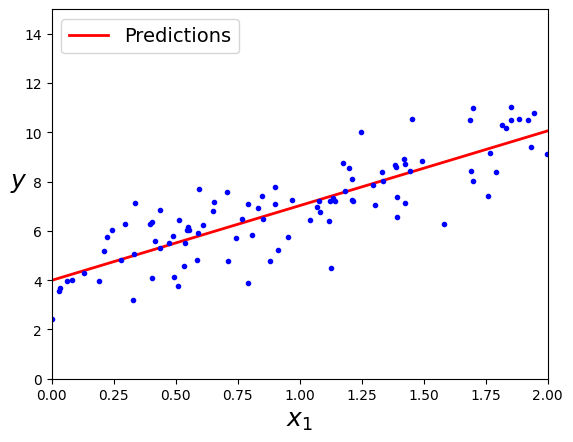

In [94]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])

plt.show()

In [95]:
# fazendo a regressão linear com Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.9932401]), array([[3.03329769]]))

In [96]:
lin_reg.predict(X_new)

array([[ 3.9932401 ],
       [10.05983548]])

In [97]:
# A classe LinearRegression é baseada na função scipy.linalg.lstsq() (minimos quadrados)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.9932401 ],
       [3.03329769]])

In [98]:
# Essa função calcula o pseudoinverso de X (especificamente a pseudo inversa de Moore-Penrose)

np.linalg.pinv(X_b).dot(y)

array([[3.9932401 ],
       [3.03329769]])

In [99]:
# O pseudoinverso possui algumas melhorias em relação a calcular a equação normal. Não o quanto será interessante focar nisso para meus
# estudo, mas segue esta pequena anotação caso algum dia seja conveniente.

# Gradiente descendente
### Uma forma diferente de treinar um modelo de regressão linear que se adpta melhor aos casos em que existe um grande número de características ou muitas instâncias de treinamento para caber na memória

OBS.: Ao usar o gradiente descendente, você deve garantir que todas as características tenham escala semelhante (por exemplo, usar a classe StandardScale da Scikit-Learn) ou levará um bom tempo para convergir

### Gradiente descente em batch

$$\theta(próxima_etapa) = \theta - \eta \nabla_\theta MSE(\theta)$$

In [100]:
eta = 0.1 # Taxa de aprendizado
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # inicialização aleatória

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) -y)
    theta = theta - eta * gradients

theta

array([[3.9932401 ],
       [3.03329769]])

In [101]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

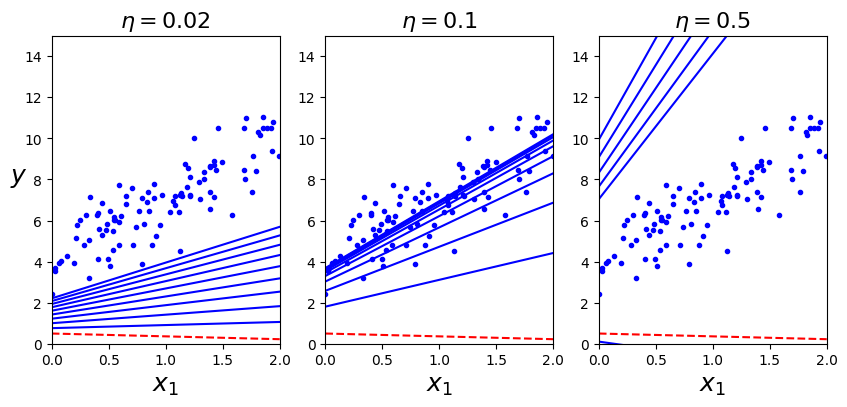

In [102]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Gradiente descendente estocástico

Neste metodo é utilizado um valor por vez aleátorio dos dados para o treinamento, o theta é calculado e o processo se repete até aproximar do minimo. Um problema é a oscilação, então ele nunca ficará exatamento no minimo global mas sempre perto do mesmo. Uma forma de melhorar isso é determinar um cronograma de aprendizado de forma que a taxa de aprendizado vá diminuindo com o passar do treino. Por não usar todos os dados a cada treino como o modelo em bath é um método mais rápido quando utilizado em regressão linear.

In [103]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

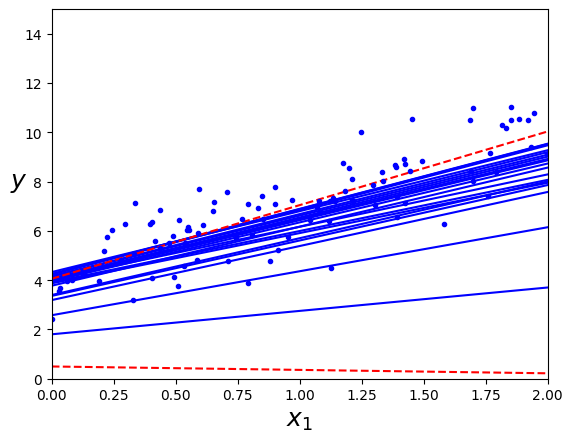

In [104]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20 or epoch == 49 and i == 0:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              

plt.show()                 

In [105]:
theta

array([[4.06484453],
       [2.99856355]])

In [106]:
# Utilizando a Scikit learn para fazer o mesmo:

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # penalty=None - sem regularização
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [107]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.98117328]), array([3.0135965]))

### Mini-batch gradient descent

In [108]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [109]:
theta

array([[3.94864   ],
       [2.96760217]])

In [110]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

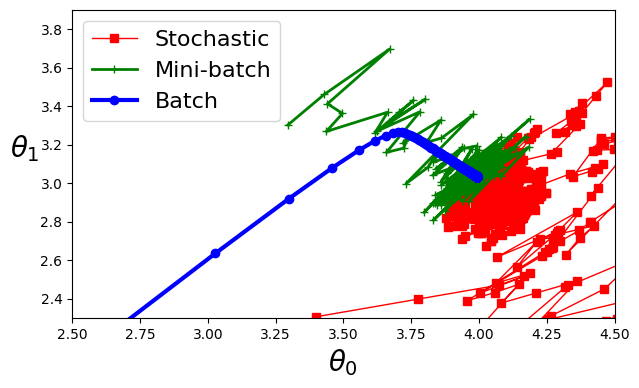

In [111]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

### Regressão Polinomial

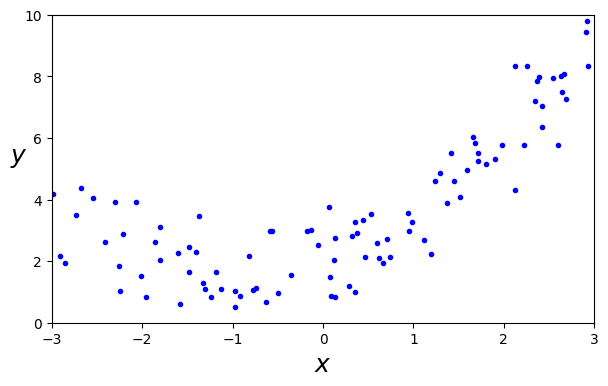

In [112]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.figure(figsize=(7,4))
plt.plot(X, y, "b.") 
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3,3,0,10])

plt.show()

In [113]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([2.38942838])

In [114]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [115]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [116]:
# A expressão original era y = 0.5x^2 +1x +2 +ruído gaussiano

In [117]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # Cria um array com 100 valores monoespaçãdos entre -3, com o reshape transforma em uma matriz com 100 linhas e uma coluna
# print(X_new.shape)
X_new_poly = poly_features.transform(X_new)
# print(X_new_poly)
y_new = lin_reg.predict(X_new_poly)

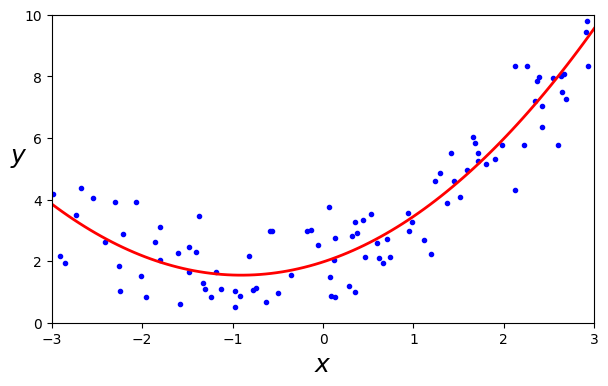

In [118]:
plt.figure(figsize=(7,4))
plt.plot(X, y, "b.") 
plt.plot(X_new, y_new, "r-", label='Predictions', linewidth=2)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3,3,0,10])

plt.show()

### Curvas de aprendizado

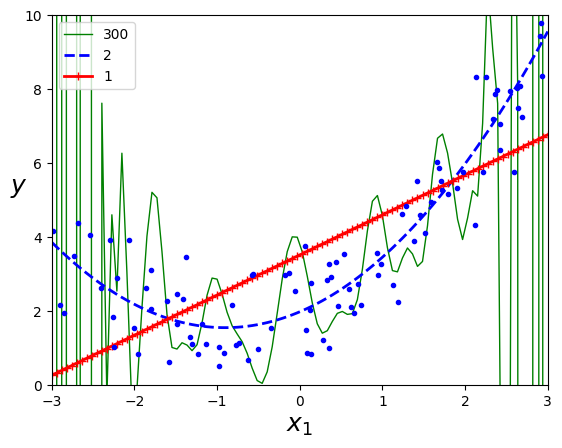

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

#### plotando as curvas de aprendizado

In [120]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

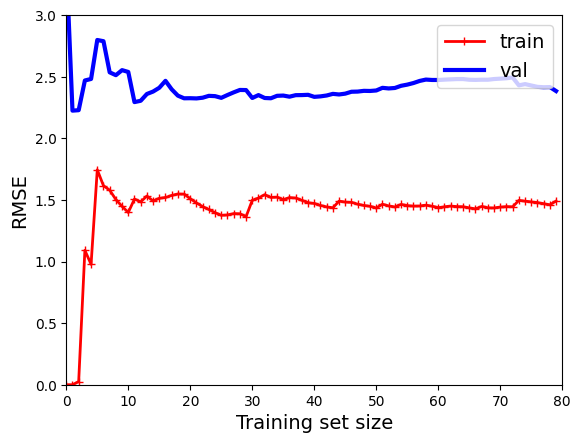

In [121]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         

plt.show()           

O modelo se subajusta, pois observe que ao se adicionar mais dados para treinamento, o modelo linear não consegue prever corretamente, o que faz com que um platô se forme e mesmo com novos dados o RMSE não se modifica com o passar do tempo. Outra observação importante é o fato do erro de treino começar em zero nos dois primeiros valores, pois o modelo linear consegue reproduzir corretamente o comportamento, em contra partida o erro de validação se encontra muito alto, ao se adicionar mais valores no treinamento temos o q ue foi observado de estabiliação em um erro alto devido ao modelo estar subajustado.

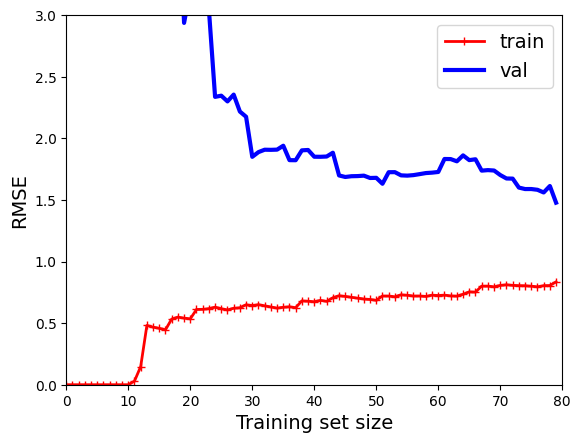

In [122]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                        

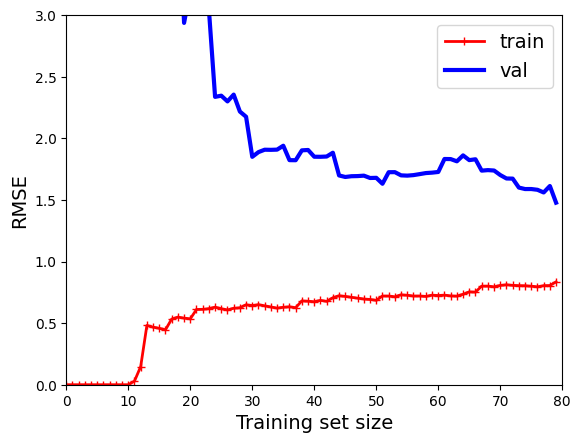

In [123]:
# Com normalização

std_scaler2 = StandardScaler()

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("std_scaler", std_scaler),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                     

Observe que em um modelo polinomial de 10 graus o erro se estabiliza em um valor bem menor e existe uma lacuna entre treinamento e validação, o que indica um desempenho melhor nos dados de treinamento do que de validação, algo aracteristico de sobreajuste, caso mais dados de treinamento fossem fornecidos as curvas se aproximariam ainda mais.

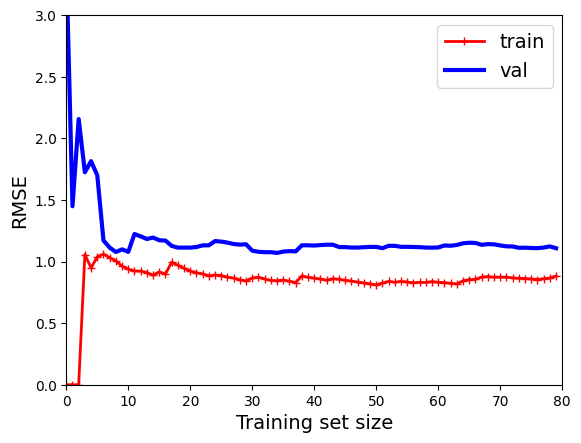

In [124]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                        

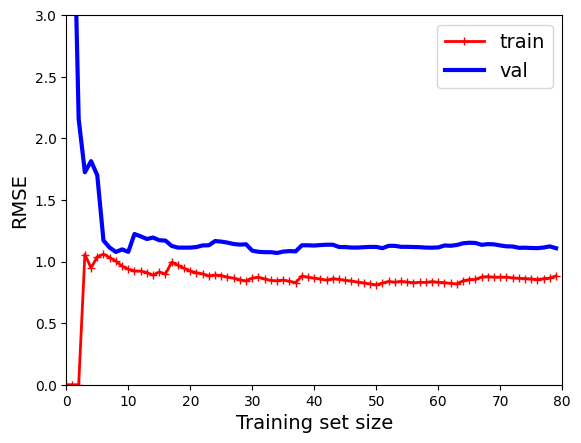

In [125]:
# Com normalização

from sklearn.pipeline import Pipeline
std_scaler3 = StandardScaler()

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("std_scaler", std_scaler),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           

plt.show()                     

#### OBS.: Normalmente, aumentar a complexidade de um modelo aumenta sa variância e reduz seu viés. Por outro lado, reduzir a complexidade de um modelo aumenta o viés e reduz a variância. Por isso o nome trade-off.

## Modelos Lineares Regularizados

### Regressão de Ridge (ou Tikhonov)

É adicionado um termo de regularização à função de custom

In [126]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [127]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [128]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55072189]])

In [129]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

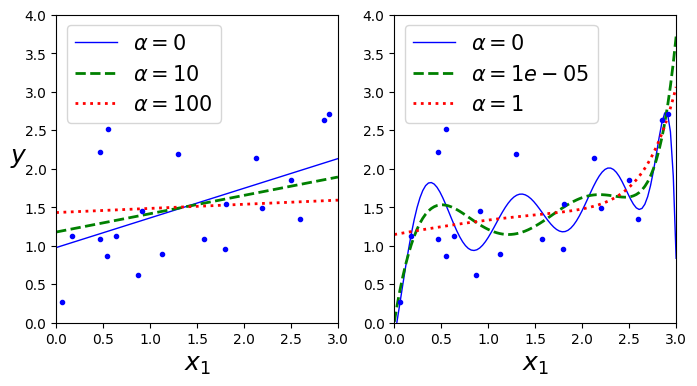

In [130]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### Regressão de Lasso

In [131]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

# Poderia ser usado SGDRegressor(penalty='11')

array([1.53788174])

### Elastic net

In [132]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

# A elastic net é um meio termo entre a regressão de Ridge e a regressão de lasso. Quando r = 0, a elastic net é equivalente à regressão de
# Ridge, quando r = 1 é equivalente a refressão de lasso

array([1.54333232])

## Quando usar cada tipo de regressão?

Quase sempre é preferível ter pelo menos um pouco de regularização, então você deve evitar uma regressão linear simples. A regressão de Ridge é um bom padrão, mas, se suspeitar de que apenas algumas características são úteis, deve optar pela regressão de lasso ou pela elastic net, pois elas tendem a reduzir a zero os pesos das características inuteis. Usualmente, prefere-se a regressão elastic net à lasso, porque a última pode se comportar impresivelmente quando o número de características for maior que o número de instâncias de treinamento ou quando várias características estiverem bastante correlacionadas.

### Early stopping

Um jeito bem diferente de regularizar algoritmos de aprendizado iterativo, como o gradiente descendente, é parar o treinamento assim que o erro de validação atingir o mínimo (early stopping).

In [133]:
# Uma implementação básica da early stopping:

from sklearn.base import clone

# prepara os dados
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
sgd_reg = SGDRegressor(max_iter=1000, tol=0, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continua de onde parou
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        vest_model = clone(sgd_reg)


NameError: name 'X_train' is not defined

In [ ]:
best_epoch, best_model

In [134]:
# TESTANDO O CÒDIGO EXTRA DO GITHUB
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [135]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
#                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

sgd_reg = SGDRegressor(max_iter=1000, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

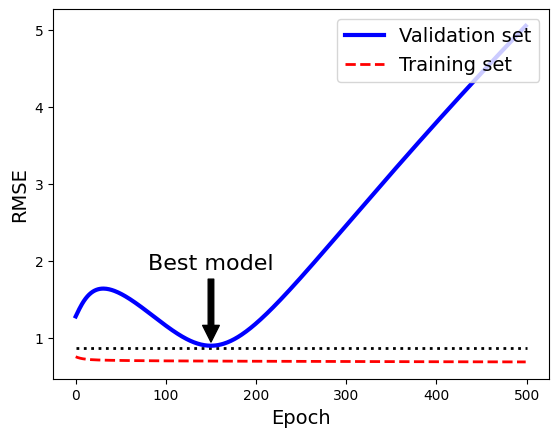

In [136]:
# sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
#                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
sgd_reg = SGDRegressor(max_iter=1000, tol=0, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

#### O resultado deste código e o que está no livro estão bem diferentes, além de que várias mudanças foram neccessarias para faze-lo funcionar, é interessante em outro momento parar com calma e ver o que está realmente acontecendo.

In [137]:
best_epoch, best_model

(150,
 SGDRegressor(eta0=0.0005, learning_rate='constant', penalty=None,
              random_state=42, tol=0, warm_start=True))

### Regressão logística

A regressão logística (regressão logit) é comumente usada para estimar a probabilidade de uma intância pertencer a uma classe específica, caso a probabilidade seja maior de 50%, o modelo prediz que a instância pertence a essa classe, denominada classe positiva, rotulada como 1; senão preve que não pertence, negativa rotulada como 0

In [138]:
# Fronteiras de decisão - Usando o banco de dados de flores Iris para exemplificar a regressão logistica

from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [139]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int_) # 1 if Iris virginica, else 0

In [140]:
from sklearn.linear_model import LogisticRegression

X = X.reshape(-1, 1) # Não tinha esta parte eu que add

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

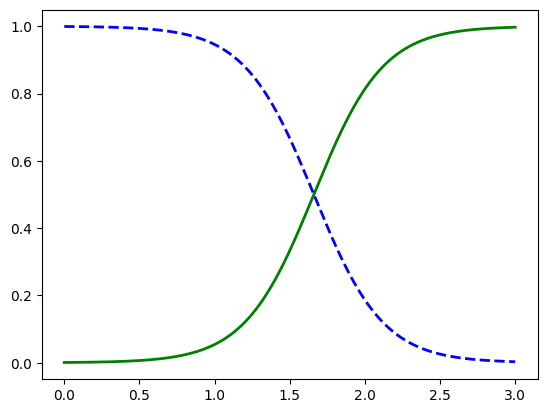

In [145]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [143]:
decision_boundary

NameError: name 'decision_boundary' is not defined

In [ ]:
log_reg.predict([[1.7], [1.5]])

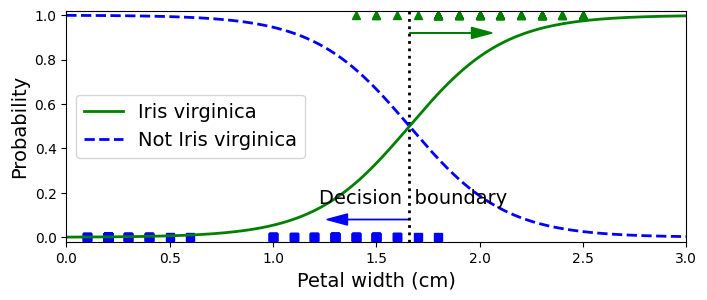

In [146]:
## Comentado pois já foi chamado em cima
# X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# y_proba = log_reg.predict_proba(X_new)
# decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # Este era o original mas precisava ser reformado
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

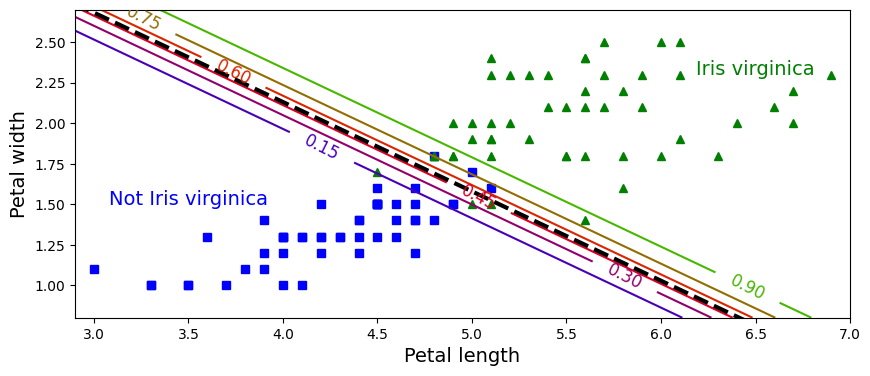

In [147]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int_)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

## Regressão softmax

In [148]:
X = iris["data"][:, (2, 3)] # Comprimento da pétala, largura da pétala
y = iris["target"]

In [151]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [152]:
softmax_reg.predict([[5, 2]])

array([2])

In [153]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])

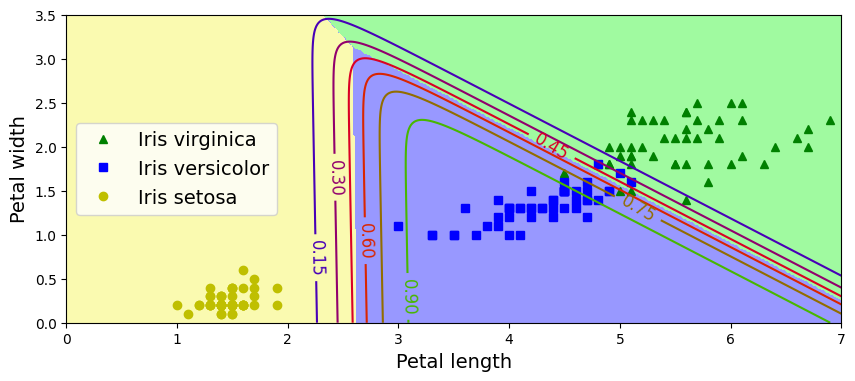

In [155]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()